In [1]:
# imports

import numpy as np

from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

from sklearn.datasets import load_iris

In [6]:
# função para construir dendrograma

def construir_dendrograma(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])

    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):

        current_count = 0

        for child_idx in merge:

            if child_idx < n_samples:

                current_count += 1

            else:

                current_count += counts[child_idx - n_samples]

        counts[i] = current_count


    linkage_matrix = np.column_stack(

        [model.children_, model.distances_, counts]

    ).astype(float)


    dendrogram(linkage_matrix, ** kwargs)

In [7]:
# criar conjunto de dados

iris = load_iris()

X= iris.data

In [9]:
# treinar modelo de agrupamento

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

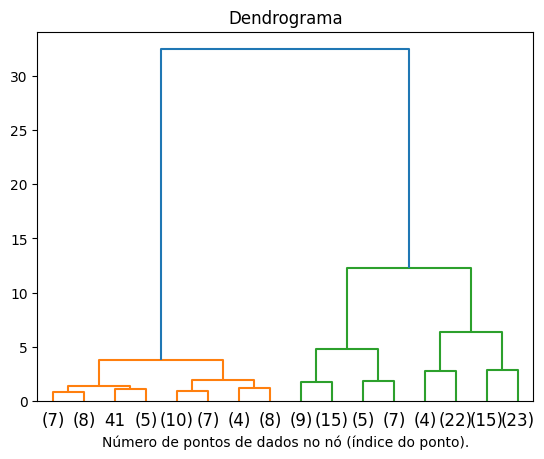

In [10]:
# visualizar dendrograma

plt.title("Dendrograma")

construir_dendrograma(model, truncate_mode="level", p=3)

plt.xlabel("Número de pontos de dados no nó (índice do ponto).")

plt.show()